Agrupamento das bases SRA e Entrevistas de Desligamentos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

SRA = pd.read_excel("SRA Ativo e Demitidos Ajustes.xlsx")
Entre = pd.read_excel("Entrevistas Ajustes.xlsx")
Tab_Analise1 = pd.merge(SRA, Entre, how="left")
display(Tab_Analise1)

,DESC.FIL,MATRICULA,FUNCAO,ADMISSAO,DEMISSAO,IDADE,SEXO,EST.CIVIL,SIT. FOLHA,DIRETOR,...,DESCR_RECISAO,CERTIFICAÇÕES,CARREIRA,DESENVOLVIMENTO PROFISSIONAL,REMUNERAÇÃO,BENEFÍCIOS,CLIMA,CULTURA,BEM ESTAR,OUTROS
0,CANDELARIA II,168186,921,2011-11-07,2022-01-07 00:00:00,53,M,SOLTEIRO(A),DEMITIDO,CLOUD PORTIFOLIO,...,DISPENSA SEM JUSTA CAUSA (API),0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CANDELARIA II,236946,201,2014-02-05,2022-01-07 00:00:00,38,M,SOLTEIRO(A),DEMITIDO,CLOUD PORTIFOLIO,...,PEDIDO DE DEMISSAO,0,1.0,1.0,1.0,1.0,1.0,0.0,1,1.0
2,CANDELARIA II,265449,604,2011-05-02,2022-01-03 00:00:00,35,M,CASADO(A),DEMITIDO,CLIENTE E SALES,...,PEDIDO DE DEMISSAO,0,0.0,0.0,1.0,1.0,0.0,1.0,1,1.0
3,CANDELARIA II,280823,111,2015-09-08,2022-01-06 00:00:00,33,F,SOLTEIRO(A),DEMITIDO,CLOUD PORTIFOLIO,...,DISPENSA SEM JUSTA CAUSA (API),0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CANDELARIA II,294487,919,2016-10-03,2022-01-04 00:00:00,35,M,CASADO(A),DEMITIDO,CLOUD PORTIFOLIO,...,PEDIDO DE DEMISSAO C/ DESC AVP,0,1.0,1.0,1.0,1.0,1.0,0.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6016,TAKODA INFRA CE,308362,935,2021-02-01,/ /,47,M,SOLTEIRO(A),ATIVO,TAKODA,...,-,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6017,TAKODA INFRA CE,309468,941,2022-01-12,/ /,35,M,SOLTEIRO(A),ATIVO,TAKODA,...,-,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6018,TAKODA INFRA CE,309521,643,2022-02-01,/ /,31,M,SOLTEIRO(A),ATIVO,TAKODA,...,-,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6019,TAKODA INFRA CE,310553,376,2022-10-17,/ /,24,M,SOLTEIRO(A),ATIVO,TAKODA,...,-,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Numero de linhas e colunas

In [ ]:
Lin= len (Tab_Analise1)
Cols = Tab_Analise1.shape[1]
print(Lin)
print(Cols)


6021
23


Tipos de dados

In [ ]:
Tab_Analise1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6021 entries, 0 to 6020
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   DESC.FIL                      6021 non-null   object        
 1   MATRICULA                     6021 non-null   object        
 2   FUNCAO                        6021 non-null   object        
 3   ADMISSAO                      6021 non-null   datetime64[ns]
 4   DEMISSAO                      6021 non-null   object        
 5   IDADE                         6021 non-null   int64         
 6   SEXO                          6021 non-null   object        
 7   EST.CIVIL                     6021 non-null   object        
 8   SIT. FOLHA                    6021 non-null   object        
 9   DIRETOR                       6021 non-null   object        
 10  HOME                          6021 non-null   object        
 11  TIPO DEMISSÃO                 

Valores Duplicados

In [ ]:
Tab_Analise1.duplicated().sum()

0

Valores Nulos

In [ ]:
Tab_Analise1.isnull().sum()

DESC.FIL                           0
MATRICULA                          0
FUNCAO                             0
ADMISSAO                           0
DEMISSAO                           0
IDADE                              0
SEXO                               0
EST.CIVIL                          0
SIT. FOLHA                         0
DIRETOR                            0
HOME                               0
TIPO DEMISSÃO                      0
TIPO_RES                           0
DESCR_RECISAO                      0
CERTIFICAÇÕES                      0
CARREIRA                        5099
DESENVOLVIMENTO PROFISSIONAL    5099
REMUNERAÇÃO                     5099
BENEFÍCIOS                      5099
CLIMA                           5099
CULTURA                         5099
BEM ESTAR                       5099
OUTROS                          5099
dtype: int64

Nomes das colunas

In [ ]:
Tab_Analise1.columns

Index(['DESC.FIL', 'MATRICULA', 'FUNCAO', 'ADMISSAO', 'DEMISSAO', 'IDADE',
       'SEXO', 'EST.CIVIL', 'SIT. FOLHA', 'DIRETOR', 'HOME', 'TIPO DEMISSÃO',
       'TIPO_RES', 'DESCR_RECISAO', 'CERTIFICAÇÕES', 'CARREIRA',
       'DESENVOLVIMENTO PROFISSIONAL', 'REMUNERAÇÃO', 'BENEFÍCIOS', 'CLIMA',
       'CULTURA', 'BEM ESTAR', 'OUTROS'],
      dtype='object')

Analise Demitidos Voluntarios

In [ ]:
Analise_Demitidos = Tab_Analise1[(Tab_Analise1['SIT. FOLHA']=='DEMITIDO') & (Tab_Analise1['TIPO DEMISSÃO']=='VOLUNTARIO')]
Analise_Demitidos['DIRETOR'].value_counts()
Analise_Demitidos.shape

(922, 23)

In [ ]:
def outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    df_filtrado = df[(df[column_name] >= limite_inferior) & (df[column_name] <= limite_superior)]
    return df_filtrado

remover_outliers = ['CARREIRA', 'DESENVOLVIMENTO PROFISSIONAL', 'REMUNERAÇÃO', 'BENEFÍCIOS', 'CLIMA', 'CULTURA', 'OUTROS']


for column in remover_outliers:
    Analise_Demitidos = outliers(Analise_Demitidos, column)

#Sem outliers

In [ ]:
Analise_Demitidos.shape

(922, 23)

<ipython-input-219-84741ec91127>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = Analise_Demitidos.corr()


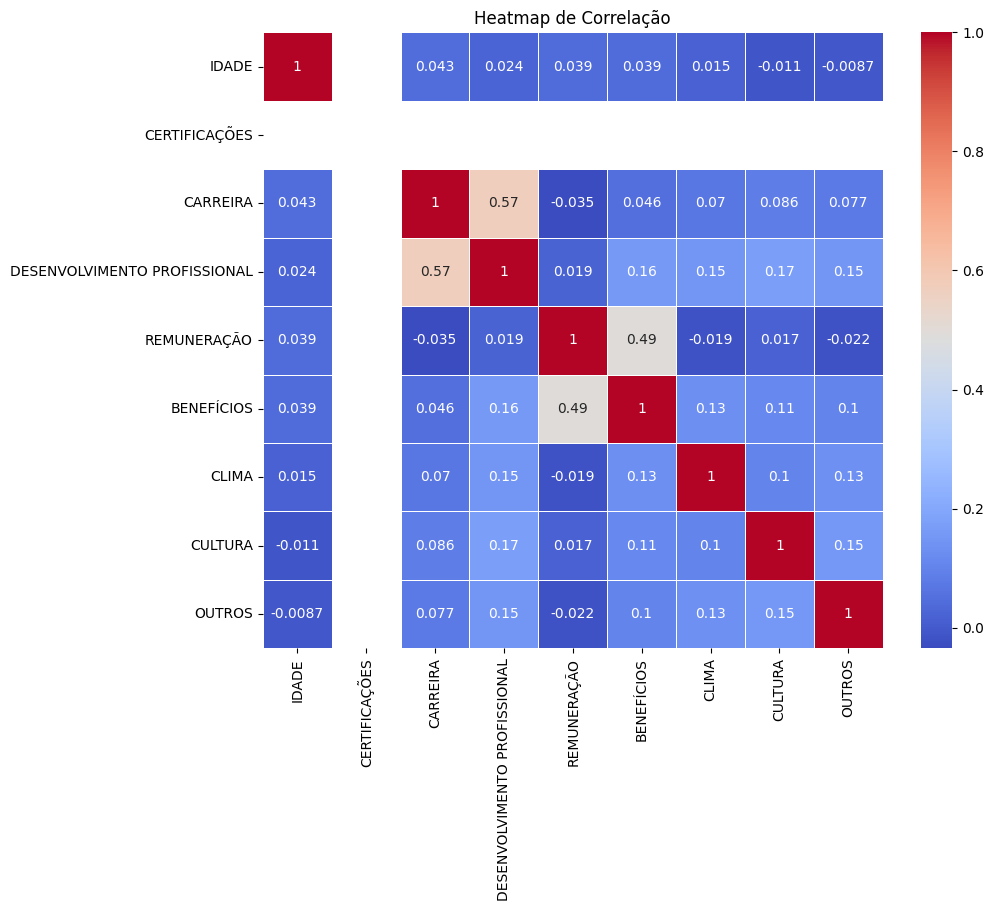

In [ ]:
correlation_matrix = Analise_Demitidos.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap de Correlação')
plt.show()


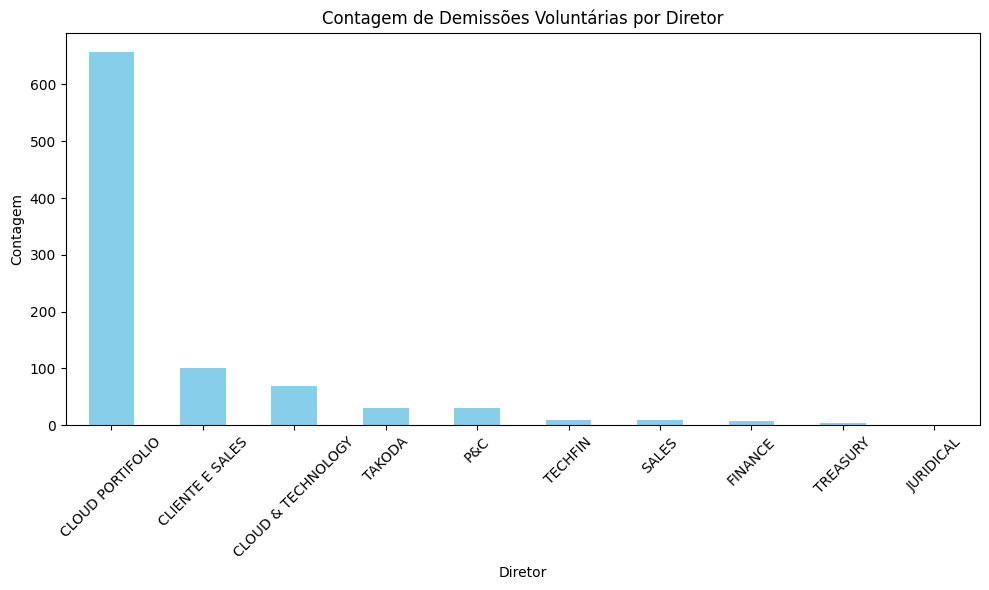

In [ ]:
contagem_diretores = Analise_Demitidos['DIRETOR'].value_counts()
plt.figure(figsize=(10, 6))
contagem_diretores.plot(kind='bar', color='skyblue')
plt.title('Contagem de Demissões Voluntárias por Diretor')
plt.xlabel('Diretor')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

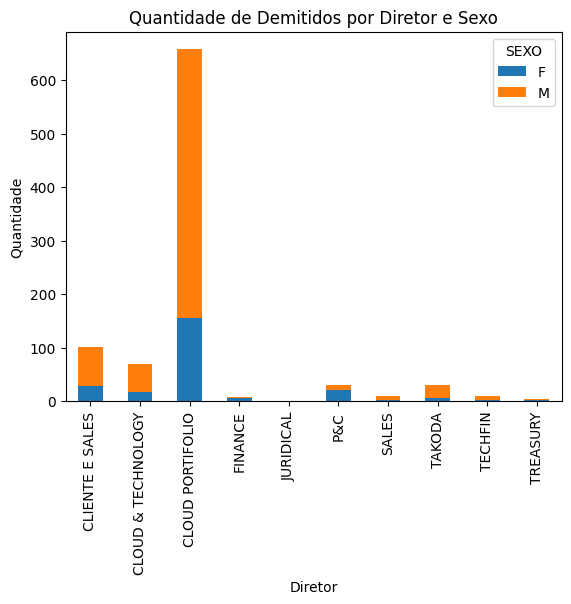

In [ ]:
Analise_Demitidos[['DIRETOR','SEXO']].groupby(['DIRETOR','SEXO']).size()
dados__ = Analise_Demitidos[['DIRETOR', 'SEXO']].groupby(['DIRETOR', 'SEXO']).size()
dados__ = dados__.unstack()
dados__.plot(kind='bar', stacked=True)
plt.xlabel('Diretor')
plt.ylabel('Quantidade')
plt.title('Quantidade de Demitidos por Diretor e Sexo')
plt.show()

In [ ]:
Analise_Demitidos.groupby(['DIRETOR'])['IDADE'].agg(['max','min','mean','median'])

,max,min,mean,median
DIRETOR,,,,
CLIENTE E SALES,57,18,34.821782,33.0
CLOUD & TECHNOLOGY,53,19,33.681159,32.0
CLOUD PORTIFOLIO,68,18,35.735562,35.0
FINANCE,49,22,32.125000,31.0
JURIDICAL,34,34,34.000000,34.0
P&C,53,18,31.100000,31.5
SALES,48,27,34.100000,32.5
TAKODA,56,20,34.935484,33.0
TECHFIN,45,18,32.300000,32.0


In [ ]:
Analise_Motivos=Analise_Demitidos[['DIRETOR','CARREIRA','DESENVOLVIMENTO PROFISSIONAL','REMUNERAÇÃO','BENEFÍCIOS','CLIMA','CULTURA','BEM ESTAR','OUTROS']].groupby(['DIRETOR']).sum()
display(Analise_Motivos)

<ipython-input-223-902ff804f8b0>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Analise_Motivos=Analise_Demitidos[['DIRETOR','CARREIRA','DESENVOLVIMENTO PROFISSIONAL','REMUNERAÇÃO','BENEFÍCIOS','CLIMA','CULTURA','BEM ESTAR','OUTROS']].groupby(['DIRETOR']).sum()


,CARREIRA,DESENVOLVIMENTO PROFISSIONAL,REMUNERAÇÃO,BENEFÍCIOS,CLIMA,CULTURA,OUTROS
DIRETOR,,,,,,,
CLIENTE E SALES,53.0,69.0,50.0,65.0,41.0,41.0,40.0
CLOUD & TECHNOLOGY,42.0,57.0,30.0,50.0,31.0,35.0,28.0
CLOUD PORTIFOLIO,303.0,419.0,315.0,434.0,287.0,259.0,266.0
FINANCE,7.0,7.0,3.0,3.0,7.0,2.0,4.0
JURIDICAL,1.0,1.0,1.0,1.0,0.0,0.0,0.0
P&C,11.0,21.0,12.0,23.0,20.0,12.0,14.0
SALES,5.0,10.0,6.0,8.0,3.0,7.0,6.0
TAKODA,14.0,23.0,13.0,23.0,16.0,15.0,19.0
TECHFIN,5.0,8.0,6.0,7.0,3.0,4.0,4.0


In [ ]:
Analise_Motivos.mean()

CARREIRA                        44.3
DESENVOLVIMENTO PROFISSIONAL    61.8
REMUNERAÇÃO                     43.7
BENEFÍCIOS                      61.6
CLIMA                           41.0
CULTURA                         37.8
OUTROS                          38.2
dtype: float64

In [ ]:
Analise_Motivos.var()

CARREIRA                         8575.344444
DESENVOLVIMENTO PROFISSIONAL    16285.733333
REMUNERAÇÃO                      9324.900000
BENEFÍCIOS                      17591.155556
CLIMA                            7658.666667
CULTURA                          6238.400000
OUTROS                           6574.844444
dtype: float64

In [ ]:
Analise_Motivos.std()

CARREIRA                         92.603156
DESENVOLVIMENTO PROFISSIONAL    127.615569
REMUNERAÇÃO                      96.565522
BENEFÍCIOS                      132.631654
CLIMA                            87.513808
CULTURA                          78.983543
OUTROS                           81.085414
dtype: float64